#Data Statistics


In [1]:
import os
import json
import sys

import time
def read_json(path):
    with open(path, 'r', encoding="utf-8") as f:
        data = json.load(f)
    return data

def write_json(data, path):
    
    if not os.path.exists(os.path.dirname(path)):
        os.makedirs(os.path.dirname(path))
    with open(path, 'w', encoding="utf-8") as f:
        json.dump(data, f, indent=4, ensure_ascii=False)

In [2]:
path = "/Users/sefika/phd_projects/converse_relations/data/cleaned_asymetrics.json"
data = read_json(path)
print("Total number of asymmetrics:", len(data))


Total number of asymmetrics: 3401


In [3]:
key_to_relation = read_json('/Users/sefika/phd_projects/llm-catastrophic-re/canonical_relation_maps/fewrel/pid2name.json')

# data[0]['possible_probs'][0]

list_of_relations = []
for item in data:
    prob_relation = item['possible_probs'][0]
    list_of_relations.append(key_to_relation[prob_relation][0])





In [ ]:
list_of_relations


Category Counts:
       Category  Count
0        child    988
1       father    571
2       mother    515
3  followed by    508
4      follows    493
5     has part    174
6      part of    152

Total Entries: 3401
Unique Categories: 7


/var/folders/b8/x9hxschj621flgyxkdpjwj180000gn/T/ipykernel_15392/3284479159.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


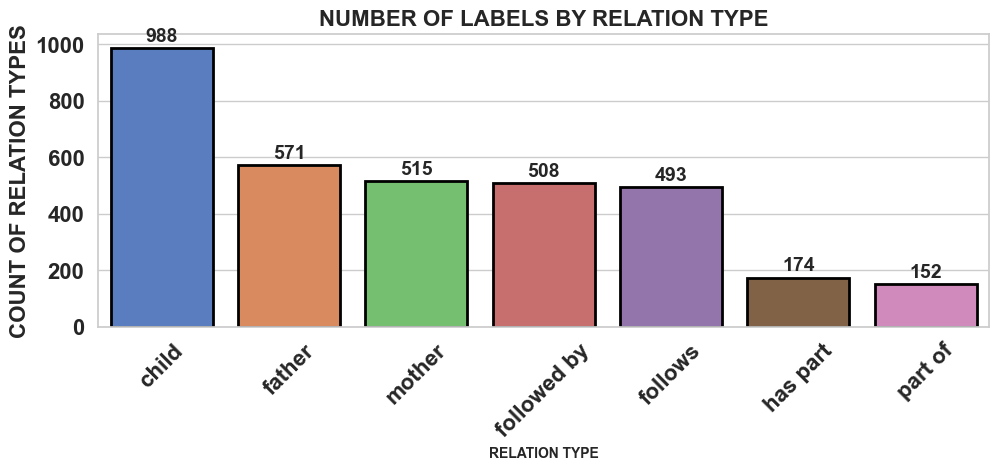

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example string data (replace with your real list)
data = list_of_relations  

# Convert to pandas DataFrame
df = pd.DataFrame(data, columns=['Category'])

# Frequency count
value_counts = df['Category'].value_counts().reset_index()
value_counts.columns = ['Category', 'Count']

print("Category Counts:\n", value_counts)
print("\nTotal Entries:", len(df))
print("Unique Categories:", df['Category'].nunique())

# --- Visualization ---
sns.set(style="whitegrid")

plt.figure(figsize=(10, 4))

# Add borders around bars using edgecolor and linewidth
ax = sns.barplot(
    data=value_counts,
    x='Category',
    y='Count',
    palette='muted',
    edgecolor='black',   # border color
    linewidth=2          # border thickness
)

# Add count labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=2, fontsize=14, weight='bold')

plt.title("NUMBER OF LABELS BY RELATION TYPE", fontsize=16, weight='bold')
plt.xlabel("RELATION TYPE", fontsize=10, weight='bold')
plt.ylabel("COUNT OF RELATION TYPES", fontsize=16, weight='bold')
plt.tight_layout()
plt.xticks(rotation=45, fontsize=16, weight='bold')
plt.yticks(fontsize=16, weight='bold')

plt.savefig('./category_frequency.pdf', dpi=300)
plt.show()

